In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tables = [#'barometer', 
#          'battery', 
#          'bluetooth', 
          'calls',
          'fitbit_data', 
          'locations', 
          #'network', 
          'plugin_google_activity_recognition', 
          'plugin_ios_activity_recognition', 
          'screen', 
#          'wifi'
]
data_path = '/Users/yasaman/UWEXP/analysis-scripts/sensors/counting/results/merged'
result_file = '/Users/yasaman/UWEXP/analysis-scripts/sensors/counting/results/heatmap.png'

In [3]:
num_people_per_day = None
num_days_per_person = None
for table in tables:
    data = pd.read_csv('{}/{}.txt'.format(data_path, table),
                       index_col = 'date',
                       sep='\t', 
                       lineterminator='\n')
    
    if num_people_per_day is None:
        num_people_per_day = pd.DataFrame(index=data.index)
    
    if num_days_per_person is None:
        num_days_per_person = pd.DataFrame(index=data.columns)
        
    num_people_per_day[table] = data.count(axis=1)
    num_days_per_person[table] = data.count()

num_people_per_day['activity'] = num_people_per_day['plugin_google_activity_recognition'] + num_people_per_day['plugin_ios_activity_recognition']
num_people_per_day.drop(columns=['plugin_google_activity_recognition', 'plugin_ios_activity_recognition'], inplace=True)
num_people_per_day.rename(index=str, columns={'fitbit_data' : 'fitbit'}, inplace=True)
num_people_per_day.to_csv('{}/num_per_day.txt'.format(data_path),
                          sep='\t', 
                          line_terminator='\n',
                          encoding = "ISO-8859-1",
                          mode='w')
num_people_per_day = num_people_per_day.T

num_days_per_person['activity'] = num_days_per_person['plugin_google_activity_recognition'] + num_days_per_person['plugin_ios_activity_recognition']
num_days_per_person.drop(columns=['plugin_google_activity_recognition', 'plugin_ios_activity_recognition'], inplace=True)
num_days_per_person.rename(index=str, columns={'fitbit_data' : 'fitbit'}, inplace=True)
num_days_per_person.to_csv('{}/num_per_pid.txt'.format(data_path),
                           sep='\t', 
                           line_terminator='\n',
                           encoding = "ISO-8859-1",
                           mode='w')

In [4]:
range_ = pd.DataFrame([num_days_per_person.mean() - 2 * num_days_per_person.std(), 
                       num_days_per_person.mean() + 2 * num_days_per_person.std()])
range_

,battery,bluetooth,calls,fitbit,locations,screen,wifi,activity
0,55.052909,46.533723,11.845565,16.819835,43.691827,51.660126,54.100699,30.673786
1,173.225698,165.814536,141.368366,141.468723,178.974839,174.319974,173.411739,187.714273


In [5]:
very_low_num = num_days_per_person.apply(lambda x : (x < range_[x.name][0])).sum(axis=1)
very_low_num = very_low_num[very_low_num > 0]
very_low_num
# 18, 29, 46, 48, 68, 71, 74, 81, 83, 95, 103, 113, 133, 151, 152, 159, 173, 178, 182, 184, 196, 197, 199, 200, 203, 204
# no post: 71, 81, 83, 133, 152, 182, 197, 200
# have pots: 29, 46, 48, 68, 74, 95, 103, 113, 151, 159, 173, 178, 184, 196, 199, 203, 204

018    7
029    5
046    1
048    1
068    1
071    8
074    1
081    1
083    8
095    1
103    2
113    1
133    8
151    3
152    2
159    2
173    2
178    1
182    8
184    2
196    2
197    8
199    1
200    5
203    1
204    7
dtype: int64

In [6]:
no_post_pids = ['018', '026', '027', '041', '053', '056', '069', '071', '081', '083', '085', '089', '100', '101', 
                '107', '112', '114', '119', '121', '129', '131', '133', '135', '139', '141', '147', '152', '164', 
                '182', '192', '197', '200', '208']

In [7]:
num_days_per_person = num_days_per_person.drop(set(num_days_per_person.index) & set(no_post_pids))

In [4]:
dates = list(num_people_per_day.columns)
offset = 2
weeks = [dates[i+offset] for i in range(0, len(dates)-2, 7)]

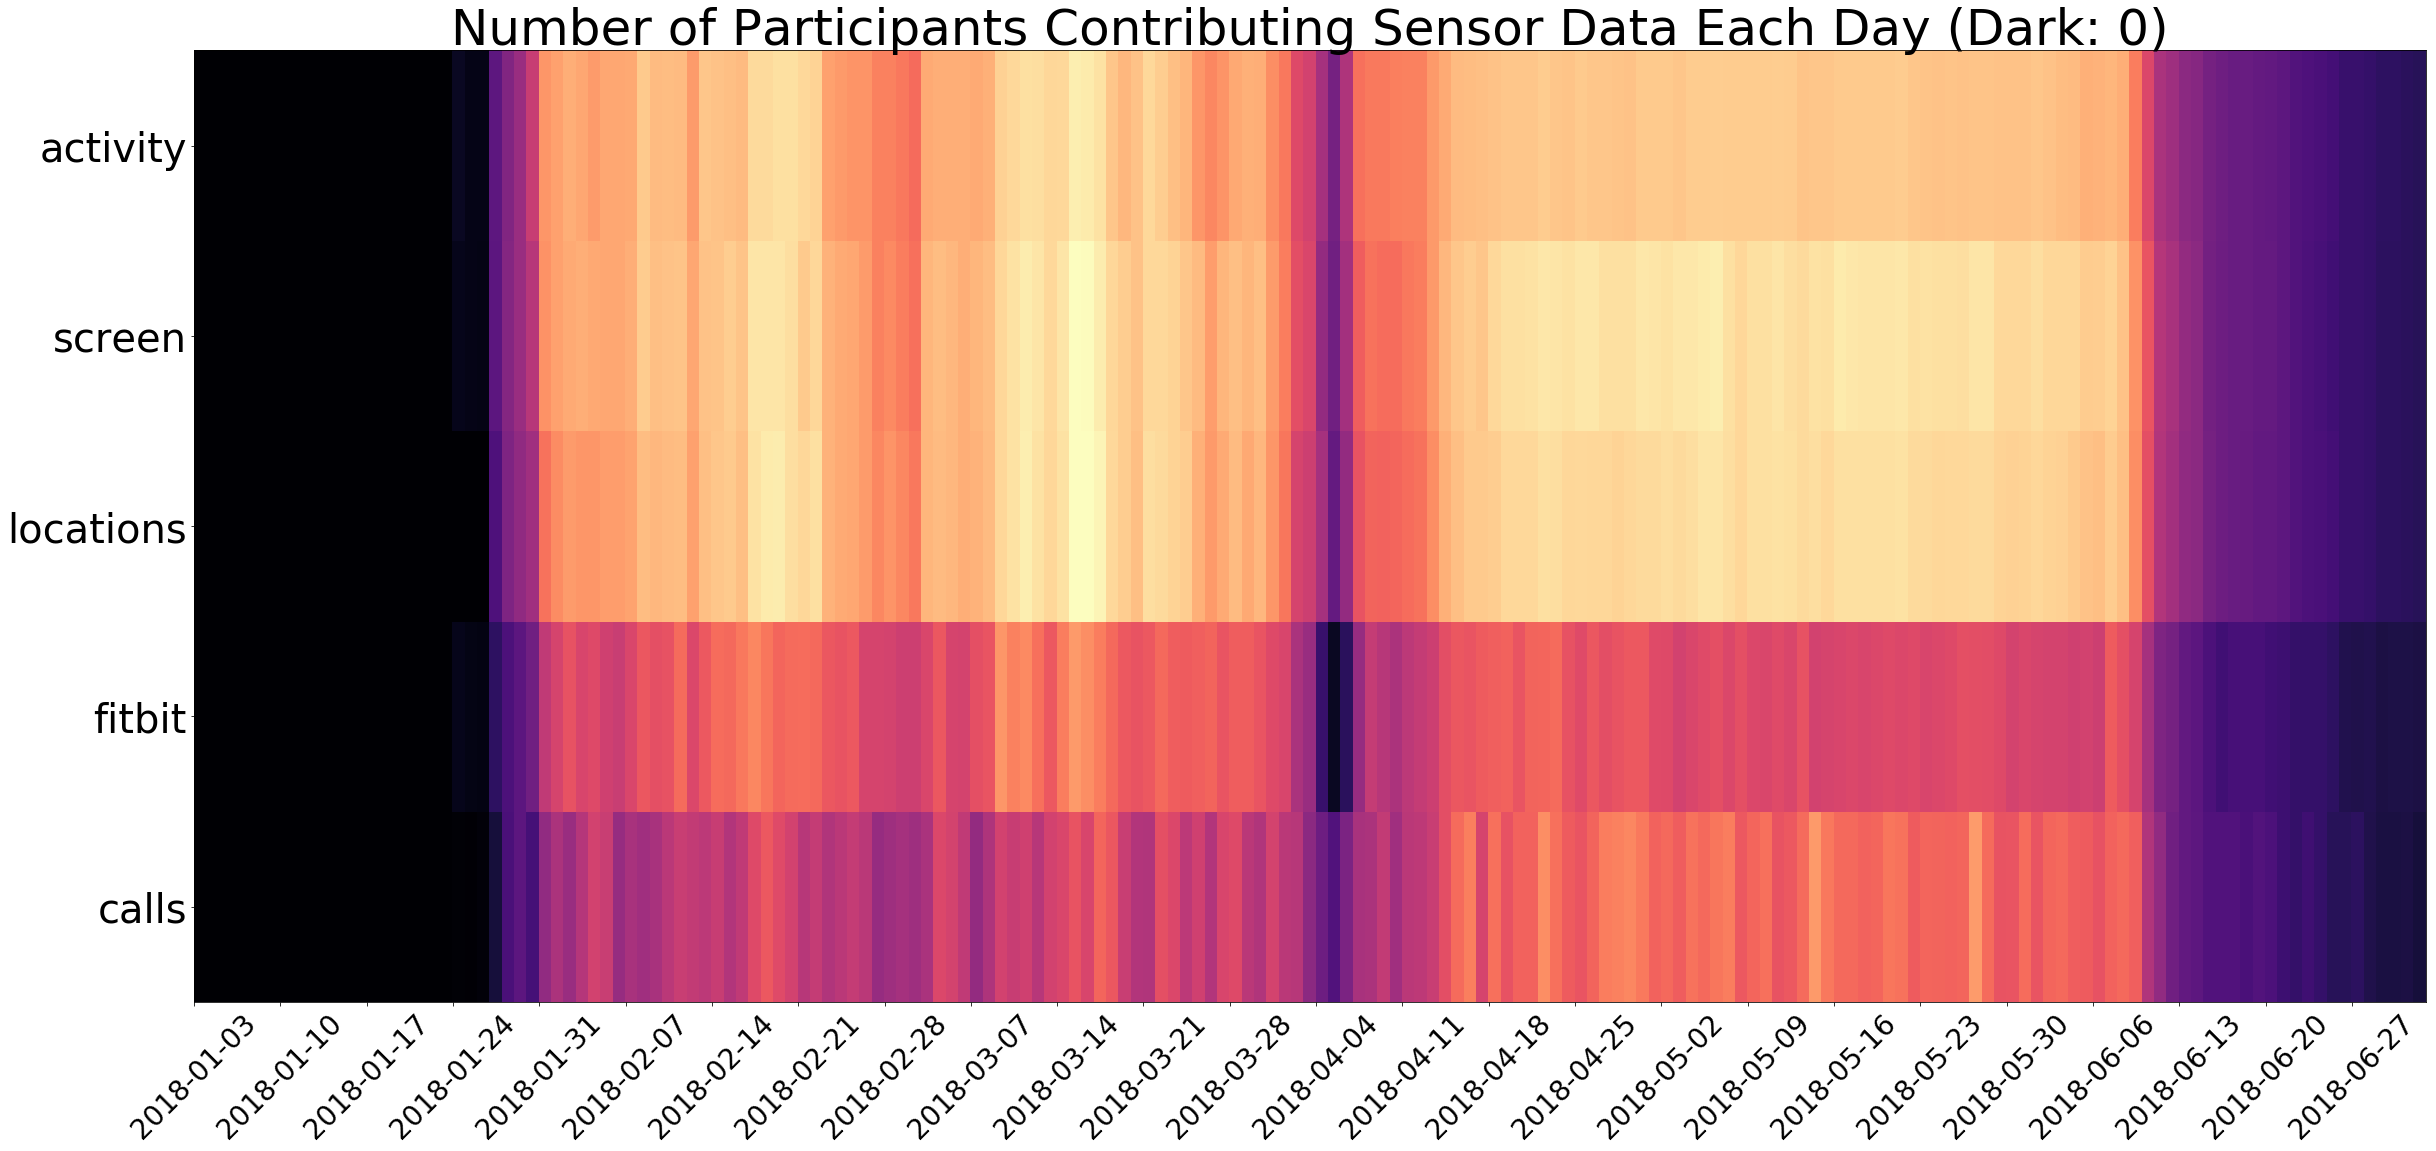

In [5]:
fig, ax = plt.subplots(figsize=(40, 17.5))
ax.set_title('Number of Participants Contributing Sensor Data Each Day (Dark: 0)', fontsize=50)
plt.pcolor(num_people_per_day, cmap='magma')
plt.yticks(np.arange(0.5, len(num_people_per_day.index), 1), num_people_per_day.index, fontsize=40)
#plt.xticks(np.arange(0.5, len(num_people_per_day.columns), 1), num_people_per_day.columns, rotation=90)
plt.xticks(np.arange(0, len(weeks) * 7 - 2, 7), weeks, rotation=45, fontsize=28)
plt.show()
fig.tight_layout()
fig.savefig(result_file)
plt.close(fig)